In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [5]:
traindata = pd.read_csv(r'C:\Users\sponm\Desktop\Machine Learning\train.csv')

In [6]:
traindata.head()

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [7]:
traindata.shape

(40000, 2)

In [8]:
traindata.describe()

,review,label
count,40000,40000
unique,39720,2
top,"When i got this movie free from my job, along ...",pos
freq,3,20011


In [9]:
traindata['label'].value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = traindata['label'].values

In [11]:
y = le.fit_transform(y)

In [12]:
y[:100]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [13]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [14]:
def clean_text(sample):
    sample = sample.lower()
    sample = sample.replace("<br /><br />","")
    
    sample = re.sub("[^a-zA-Z]+"," ",sample)
    
    sample  = sample.split()
    
    sample = [ps.stem(s) for s in sample if s not in sw]
    
    sample = " ".join(sample)
    
    return sample

In [15]:
traindata['review'][1]

'http://video.google.com/videoplay?docid=211772166650071408&hl=en Distribution was tried.<br /><br />We opted for mass appeal.<br /><br />We want the best possible viewing range so, we forgo profit and continue our manual labor jobs gladly to entertain you for working yours.<br /><br />View Texas tale, please write about it... If you like it or not, if you like Alex or not, if you like Stuie, Texas or Texas tale... Just write about it.<br /><br />Your opinion rules.'

In [16]:
clean_text(traindata['review'][1])

'http video googl com videoplay docid hl en distribut tri opt mass appeal want best possibl view rang forgo profit continu manual labor job gladli entertain work view texa tale pleas write like like alex like stuie texa texa tale write opinion rule'

In [17]:
traindata['cleaned_review']= traindata['review'].apply(clean_text)

In [18]:
traindata.head()

,review,label,cleaned_review
0,mature intelligent and highly charged melodram...,pos,matur intellig highli charg melodrama unbelive...
1,http://video.google.com/videoplay?docid=211772...,pos,http video googl com videoplay docid hl en dis...
2,Title: Opera (1987) Director: Dario Argento Ca...,pos,titl opera director dario argento cast cristin...
3,I think a lot of people just wrote this off as...,pos,think lot peopl wrote anoth one tom cruis weir...
4,This is a story of two dogs and a cat looking ...,pos,stori two dog cat look way back home old wise ...


In [19]:
corpus= traindata['cleaned_review'].values

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [21]:
cv = CountVectorizer(max_df= 0.5, max_features= 50000)

In [22]:
x = cv.fit_transform(corpus)

In [23]:
x.shape

(40000, 50000)

In [24]:
x

<40000x50000 sparse matrix of type '<class 'numpy.int64'>'
	with 3616171 stored elements in Compressed Sparse Row format>

In [25]:
print(x[0])

  (0, 25164)	1
  (0, 20844)	1
  (0, 19380)	1
  (0, 5614)	1
  (0, 25586)	1
  (0, 44630)	1
  (0, 5865)	1
  (0, 47635)	2
  (0, 39858)	2
  (0, 29479)	1
  (0, 24065)	1
  (0, 43631)	1
  (0, 36914)	1
  (0, 35377)	1
  (0, 24500)	1
  (0, 41060)	1


In [26]:
tfidf = TfidfTransformer()

In [27]:
x = tfidf.fit_transform(x)

In [28]:
print(x[1])

  (0, 48872)	0.1714926029777299
  (0, 48715)	0.06086146544464502
  (0, 47288)	0.06093655292037027
  (0, 46606)	0.16809144074293544
  (0, 46570)	0.24654698033979836
  (0, 46554)	0.09075298636160689
  (0, 43625)	0.062275687414314204
  (0, 41902)	0.40846814536331433
  (0, 41094)	0.21120711956857716
  (0, 39850)	0.23979075765758529
  (0, 33722)	0.12041737429813601
  (0, 31478)	0.12511799817355124
  (0, 30720)	0.1587676896858862
  (0, 30350)	0.08709013680358653
  (0, 30015)	0.09713807141936291
  (0, 28362)	0.16589968089690146
  (0, 28346)	0.10045622103110433
  (0, 25049)	0.13559350582211677
  (0, 24813)	0.19494509079277714
  (0, 23611)	0.11951842639847904
  (0, 22827)	0.15991352825351424
  (0, 21582)	0.08305330076330443
  (0, 19913)	0.16539998051313104
  (0, 19518)	0.23979075765758529
  (0, 17717)	0.18571447302702485
  (0, 17265)	0.1824321593356026
  (0, 15308)	0.21211000733164379
  (0, 12953)	0.07866785167656287
  (0, 12743)	0.15646164680726485
  (0, 10721)	0.2560693413854471
  (0, 10600)	

In [29]:
x.shape

(40000, 50000)

In [30]:
y.shape

(40000,)

## Neural Networks

In [31]:
from keras import models
from keras.layers import Dense

Using TensorFlow backend.


In [32]:
model = models.Sequential()
model.add(Dense(16,activation="relu",input_shape=(x.shape[1],)))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                800016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 800,305
Trainable params: 800,305
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

In [35]:
x_val = x[:5000]
x_train = x[5000:]

y_val = y[:5000]
y_train = y[5000:]


In [52]:
x_train.shape, y_train.shape

((35000, 50000), (35000,))

In [51]:
hist = model.fit(x, y, batch_size=128, epochs=5, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 5000 samples
Epoch 1/5
40000/40000 [==============================] - 33s 836us/step - loss: 0.0685 - accuracy: 0.9764 - val_loss: 0.0566 - val_accuracy: 0.9828
Epoch 2/5
40000/40000 [==============================] - 33s 824us/step - loss: 0.0638 - accuracy: 0.9779 - val_loss: 0.0529 - val_accuracy: 0.9846
Epoch 3/5
40000/40000 [==============================] - 34s 844us/step - loss: 0.0595 - accuracy: 0.9797 - val_loss: 0.0501 - val_accuracy: 0.9856
Epoch 4/5
40000/40000 [==============================] - 34s 848us/step - loss: 0.0550 - accuracy: 0.9815 - val_loss: 0.0473 - val_accuracy: 0.9862
Epoch 5/5
40000/40000 [==============================] - 34s 838us/step - loss: 0.0515 - accuracy: 0.9830 - val_loss: 0.0439 - val_accuracy: 0.9878


In [48]:
result = hist.history

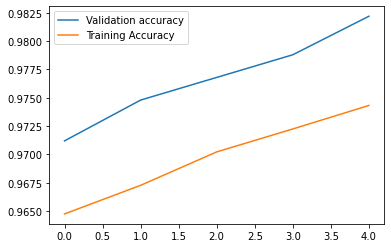

In [55]:
plt.plot(result['val_accuracy'], label="Validation accuracy")
plt.plot(result['accuracy'], label="Training Accuracy")
plt.legend()
plt.show()

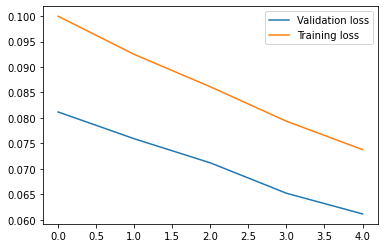

In [50]:
plt.plot(result['val_loss'], label="Validation loss")
plt.plot(result['loss'], label="Training loss")
plt.legend()
plt.show()

In [57]:
model.evaluate(x_val, y_val)

5000/5000 [==============================] - 5s 1ms/step


[0.04388439206779003, 0.9878000020980835]

## Test data

In [60]:
testdata = pd.read_csv(r'C:\Users\sponm\Desktop\Machine Learning\test.csv')

In [62]:
testdata.shape

(10000, 1)

In [63]:
testdata.head()

,review
0,Remember those old kung fu movies we used to w...
1,This movie is another one on my List of Movies...
2,How in the world does a thing like this get in...
3,"""Queen of the Damned"" is one of the best vampi..."
4,The Caprica episode (S01E01) is well done as a...


In [64]:
testdata['cleaned_review'] = testdata['review'].apply(clean_text)

In [65]:
x_test = testdata['cleaned_review']

In [66]:
x_test = cv.transform(x_test)

In [67]:
x_test.shape

(10000, 50000)

In [95]:
x_test = tfidf.transform(x_test)

In [96]:
y_pred = model.predict(x_test)

In [97]:
y_pred[ y_pred >= 0.5 ]  =  1

In [98]:
y_pred = y_pred.astype('int')

In [99]:
y_pred[:10]

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [100]:
dic = {0 : 'neg' , 1 : 'pos'}
y_pred = [ dic[p[0]] for p in y_pred ]

In [104]:
ids = np.arange(10000)

In [105]:
prediction = np.stack((ids, y_pred), axis =1)

In [106]:
df = pd.DataFrame(prediction, columns=['Id', 'label'])

In [107]:
df.to_csv("prediction.csv", index = False)